In [37]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import glob
import image_manipulation

In [47]:
class ImageDataset(Dataset):
    def __init__(self, old_image_path:str, reconstructed_image_path:str, transform = None):
        self.transform = transform
        self.old_image_path = old_image_path
        self.reconstructed_image_path = reconstructed_image_path
        self.old_image_files = sorted(glob.glob(old_image_path + "/*.*"))
        self.reconstructed_image_files = sorted(glob.glob(reconstructed_image_path + "/*.*"))
        
    def __getitem__(self, index):
        reconstruted_image = Image.open(self.reconstructed_image_files[index % len(self.reconstructed_image_files)])
        old_image = Image.open(self.old_image_files[index % len(self.old_image_files)])
        
        if self.transform: 
            img_A = self.transform(old_image)
            img_B = self.transform(reconstruted_image)
        
        return {
            "A": img_A,
            "B": img_B
        }
    
    def __len__(self):
        return sorted(glob.glob("train/old_images" + "/*.*"))

In [48]:
dset = ImageDataset('train/old_images', "./train/reconstructed_images", transform=transforms.ToTensor())

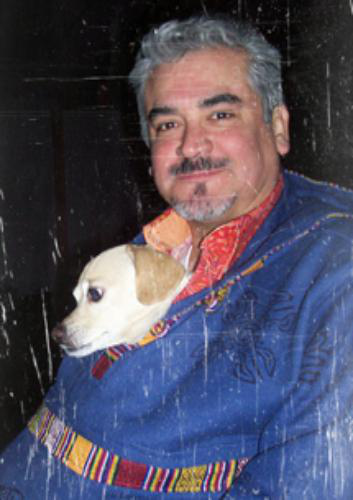

In [52]:
image_manipulation.np_to_pil(dset[0]['A'].detach().cpu().numpy())

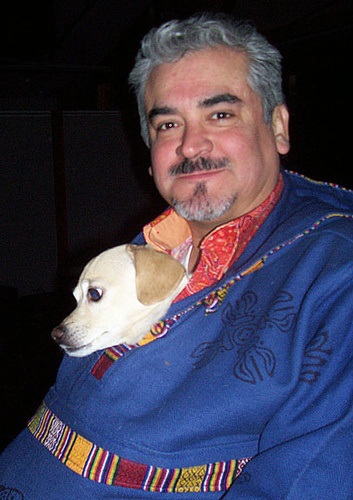

In [51]:
image_manipulation.np_to_pil(dset[0]['B'].detach().cpu().numpy())